<a href="https://colab.research.google.com/github/puskuriashwitha/Project-Fraud-Detection-in-Credit-Card-Transactions/blob/main/Project_Fraud_Detection_in_Credit_Card_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('creditcard.csv')

# Scale 'Amount' & 'Time'
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['Time'] = StandardScaler().fit_transform(df[['Time']])

# Drop duplicate/missing if any
df.drop_duplicates(inplace=True)


In [2]:
# Option 1: Undersampling
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
balanced_df = pd.concat([fraud, legit.sample(len(fraud))])

X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']


In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Use full dataset (not undersampled here)
X_full = df.drop('Class', axis=1)
y_full = df['Class']

# Isolation Forest
iso = IsolationForest(contamination=0.0017)
iso_pred = iso.fit_predict(X_full)
iso_pred = [1 if x == -1 else 0 for x in iso_pred]


In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      0.90      0.95        10

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



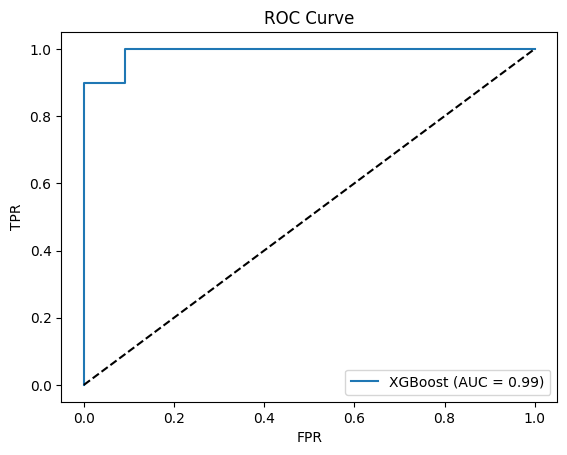

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()
